In [22]:
import pandas as pd 
import numpy as np

In [23]:
traffic_volume_df = pd.read_csv('Metro_Interstate_Traffic_Volume.csv')

In [24]:
traffic_volume_df.head()

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
0,NaN,288.28,0.0,0.0,40,Clouds,scattered clouds,2012-10-02 09:00:00,5545
1,NaN,289.36,0.0,0.0,75,Clouds,broken clouds,2012-10-02 10:00:00,4516
2,NaN,289.58,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 11:00:00,4767
3,NaN,290.13,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 12:00:00,5026
4,NaN,291.14,0.0,0.0,75,Clouds,broken clouds,2012-10-02 13:00:00,4918


In [25]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR

le_holiday = LabelEncoder()
le_weather = LabelEncoder()
le_description = LabelEncoder()

traffic_volume_df['date_time'] = pd.to_datetime(traffic_volume_df['date_time'])
traffic_volume_df['hour'] = traffic_volume_df['date_time'].dt.hour
traffic_volume_df['dayofweek'] = traffic_volume_df['date_time'].dt.dayofweek
traffic_volume_df['month'] = traffic_volume_df['date_time'].dt.month
traffic_volume_df['year'] = traffic_volume_df['date_time'].dt.year
traffic_volume_df = traffic_volume_df.drop('date_time', axis=1)

traffic_volume_df['is_rush_hour'] = traffic_volume_df['hour'].apply(lambda x: 1 if (7 <= x <= 9 or 16 <= x <= 18) else 0)
traffic_volume_df['hour_sin'] = np.sin(2 * np.pi * traffic_volume_df['hour']/24)
traffic_volume_df['hour_cos'] = np.cos(2 * np.pi * traffic_volume_df['hour']/24)
traffic_volume_df['holiday'] = le_holiday.fit_transform(traffic_volume_df['holiday'])
traffic_volume_df['weather_main'] = le_weather.fit_transform(traffic_volume_df['weather_main'])
traffic_volume_df['weather_description'] = le_description.fit_transform(traffic_volume_df['weather_description'])

X = traffic_volume_df.drop('traffic_volume',axis=1)
y = traffic_volume_df['traffic_volume']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled,y,test_size=0.2,random_state=42)

In [26]:
from sklearn.metrics import mean_squared_error, r2_score

# Create and fit the model
svm = SVR(kernel='rbf', C=100, epsilon=50) # You can also try 'linear', 'poly'
svm.fit(X_train, y_train)

# Predict and evaluate
y_pred = svm.predict(X_test)
print("MSE:", mean_squared_error(y_test, y_pred))
print("R^2 Score:", r2_score(y_test, y_pred))

MSE: 556200.2420899743
R^2 Score: 0.8593149526925628


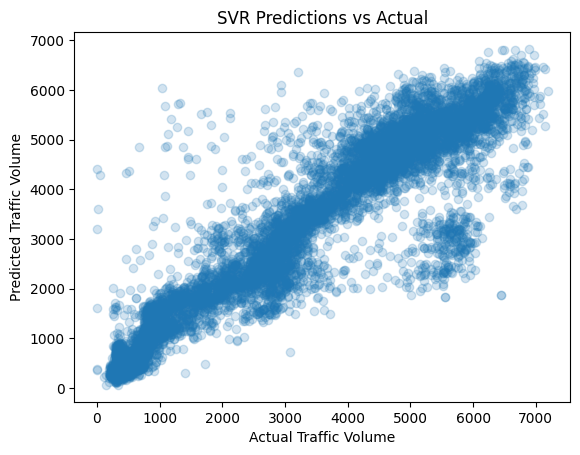

In [27]:
import matplotlib.pyplot as plt

y_pred = svm.predict(X_test)

plt.scatter(y_test, y_pred, alpha=0.2)
plt.xlabel("Actual Traffic Volume")
plt.ylabel("Predicted Traffic Volume")
plt.title("SVR Predictions vs Actual")
plt.show()